<a href="https://colab.research.google.com/github/Akshath47/MachineLearningTests/blob/main/flowerclassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Augmentation to avoid overfitting in the CNN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/15172358234_28706749a5.jpg'),
 PosixPath('datasets/flower_photos/roses/8437935944_aab997560a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15172358234_28706749a5.jpg'),
 PosixPath('datasets/flower_photos/roses/8437935944_aab997560a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg')]

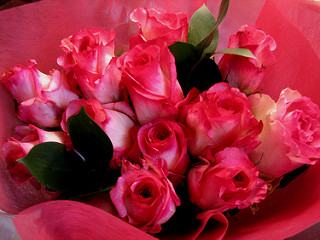

In [ ]:
tulips = list(data_dir.glob('roses/*'))
PIL.Image.open(str(tulips[4]))

data preprocessing

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/15172358234_28706749a5.jpg'),
 PosixPath('datasets/flower_photos/roses/8437935944_aab997560a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/15172358234_28706749a5.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(284, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 102s 1s/step - loss: 1.3792 - accuracy: 0.4124
Epoch 2/10
86/86 [==============================] - 98s 1s/step - loss: 0.9575 - accuracy: 0.6243
Epoch 3/10
86/86 [==============================] - 100s 1s/step - loss: 0.7661 - accuracy: 0.7086
Epoch 4/10
86/86 [==============================] - 98s 1s/step - loss: 0.5386 - accuracy: 0.7980
Epoch 5/10
86/86 [==============================] - 101s 1s/step - loss: 0.3512 - accuracy: 0.8819
Epoch 6/10
86/86 [==============================] - 107s 1s/step - loss: 0.2166 - accuracy: 0.9302
Epoch 7/10
86/86 [==============================] - 102s 1s/step - loss: 0.1000 - accuracy: 0.9731
Epoch 8/10
86/86 [==============================] - 100s 1s/step - loss: 0.0722 - accuracy: 0.9815
Epoch 9/10
86/86 [==============================] - 100s 1s/step - loss: 0.0805 - accuracy: 0.9822
Epoch 10/10
86/86 [==============================] - 100s 1s/step - loss: 0.0374 - accuracy: 0.9913


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 338ms/step - loss: 2.3782 - accuracy: 0.5991


[2.3781628608703613, 0.5991285443305969]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64%) indicating overfitting.

In [ ]:
X_test[0].shape

(180, 180, 3)

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

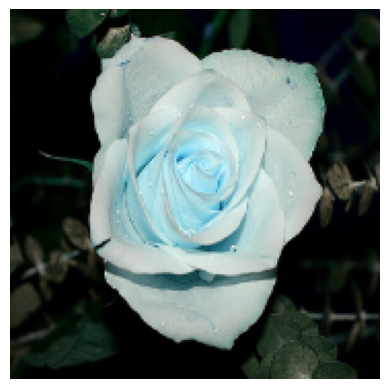

In [ ]:
# original image
plt.axis('off')
plt.imshow(X[1])

In [ ]:
# newly generated augmented image
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

training cnn using data augmentation and dropout

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 118s 1s/step - loss: 1.2589 - accuracy: 0.4611
Epoch 2/10
86/86 [==============================] - 118s 1s/step - loss: 0.9961 - accuracy: 0.6166
Epoch 3/10
86/86 [==============================] - 117s 1s/step - loss: 0.9066 - accuracy: 0.6479
Epoch 4/10
86/86 [==============================] - 114s 1s/step - loss: 0.8234 - accuracy: 0.6784
Epoch 5/10
86/86 [==============================] - 114s 1s/step - loss: 0.7968 - accuracy: 0.6893
Epoch 6/10
86/86 [==============================] - 119s 1s/step - loss: 0.7236 - accuracy: 0.7144
Epoch 7/10
86/86 [==============================] - 114s 1s/step - loss: 0.6912 - accuracy: 0.7326
Epoch 8/10
86/86 [==============================] - 115s 1s/step - loss: 0.6620 - accuracy: 0.7496
Epoch 9/10
86/86 [==============================] - 117s 1s/step - loss: 0.6328 - accuracy: 0.7693
Epoch 10/10
86/86 [==============================] - 117s 1s/step - loss: 0.6091 - accuracy: 0.7667


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 370ms/step - loss: 0.8208 - accuracy: 0.6699


[0.8208188414573669, 0.6699346303939819]

as you can see this increased accuracy of predictions